<a href="https://colab.research.google.com/github/gsbiel/cv-homography/blob/main/use_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homography Applications Examples

We are going to install OpenCV to use the homography function, as well the SIFT detector and some matching functions that are available at the OpenCV libraries. 

In [ ]:
# !pip install opencv-python==3.4.2.16
# !pip install opencv-contrib-python==3.4.2.16

**The goal is to use our own implementation of the homography calculation. To do so, we will import the file containing our implementation of the algorithm.**

- **Mounting the Drive**

In [1]:
!pip install import-ipynb
import import_ipynb
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from importlib import reload  # Py3 only; unneeded in py2.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=1f1cdc944d174222cb6fd757e4e4c166058b80a016a4194628e56f8a98b9337d
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


- **Importing the file**

In [9]:
fileName = 'custom_cv'
fileID = '10y8dMWCYJBIPfTJHtChMoHOCdiUwJgme'
our_module = drive.CreateFile({'id':'{id}'.format(id=fileID)})
our_module.GetContentFile('{fileName}.ipynb'.format(fileName=fileName))
import custom_cv
custom_cv = reload(custom_cv)

importing Jupyter notebook from custom_cv.ipynb


In [10]:
print(custom_cv.hello())

hello from custom_cv!


#Rectifying a Document

<Figure size 432x288 with 0 Axes>

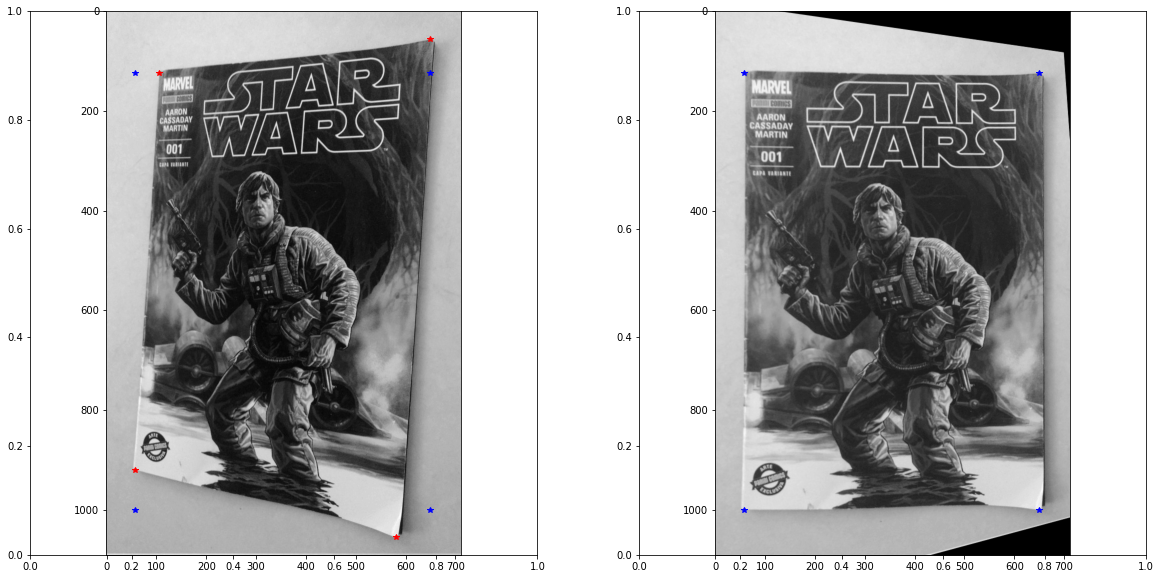

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import imutils
#import plotly.express as px
%matplotlib inline


#MIN_MATCH_COUNT = 10
img1 = cv.imread('comicsStarWars02.jpg',0) # queryImage
#img2 = cv.imread('comicsStarWars01.jpg',0) # trainImage


corners_img1 = np.array([[105,123],[650,55],[580,1055],[58,920]])
corners_img2 = np.array([[58,123],[650,123],[650,1000],[58,1000]])

src_pts = np.float32(corners_img1)
dst_pts = np.float32(corners_img2)

M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)

img4 = cv.warpPerspective(img1, M, (img1.shape[1],img1.shape[0])) #, None) #, flags[, borderMode[, borderValue]]]]	)

fig = plt.figure()
fig, axs = plt.subplots(1,2,figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
plt.imshow(img1, 'gray')
plt.plot(corners_img2[:,0],corners_img2[:,1],'*b')
plt.plot(corners_img1[:,0],corners_img1[:,1],'*r')
ax2 = fig.add_subplot(1,2,2)
plt.imshow(img4,'gray')
plt.plot(corners_img2[:,0],corners_img2[:,1],'*b')
plt.show()

# SIFT Feature Detector

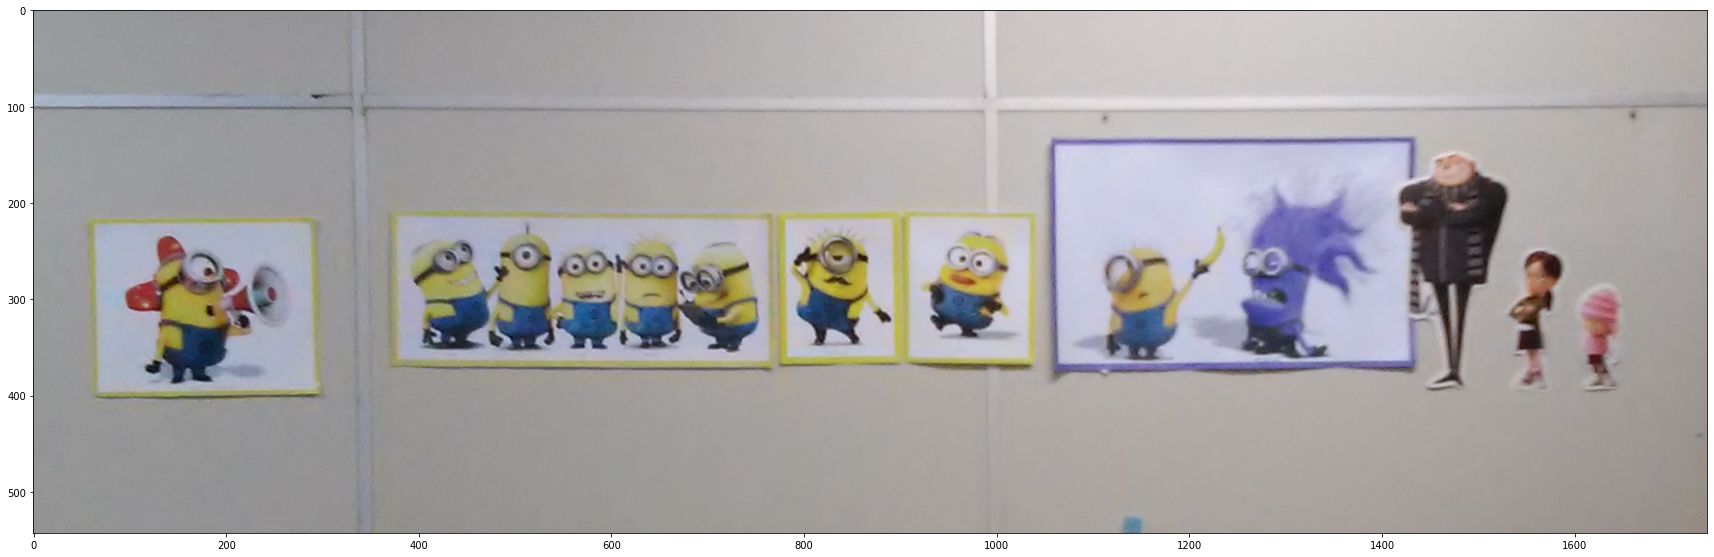

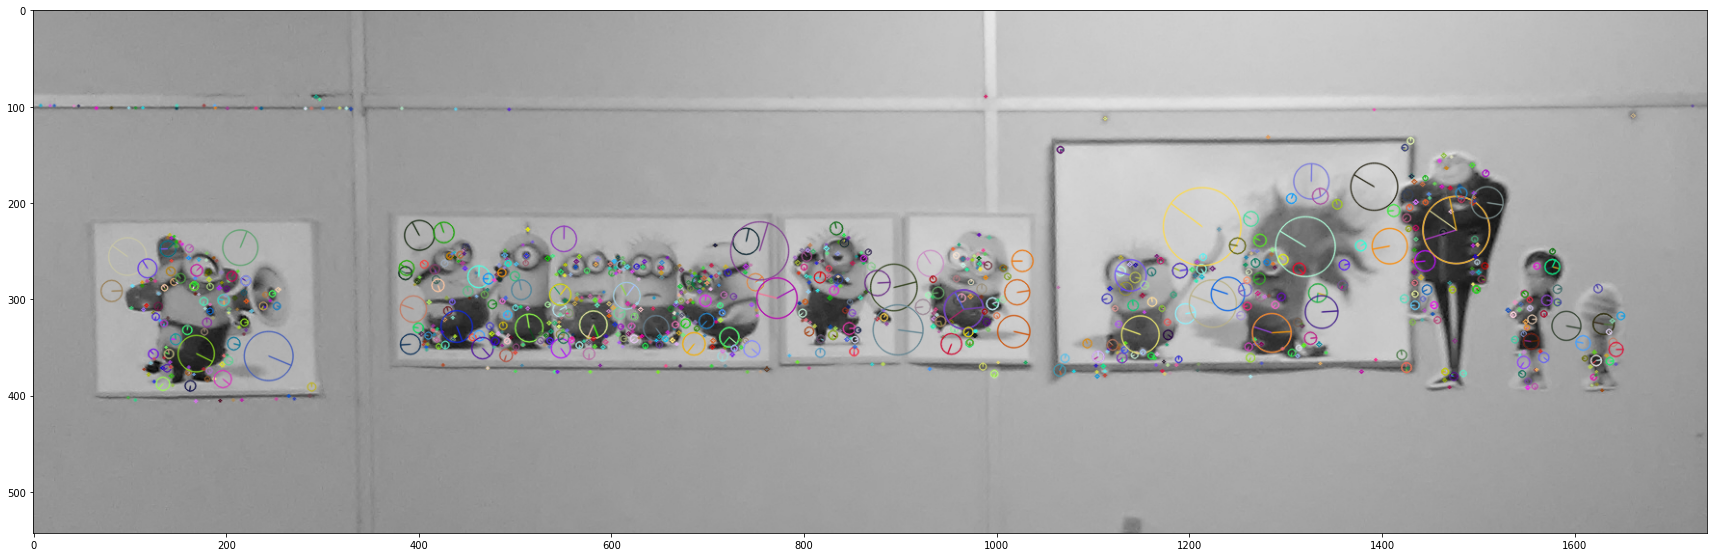

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


# Read image

img0 = cv.imread('minions01a.jpg')

# Convert to gray scale
gray= cv.cvtColor(img0,cv.COLOR_BGR2GRAY)
rgb = cv.cvtColor(img0, cv.COLOR_BGR2RGB)

# Creat sift object 
sift = cv.xfeatures2d.SIFT_create()

# Use SIFT to detect keypoints and return their descriptors
#kp = sift.detect(gray,None)
kp, des = sift.detectAndCompute(gray,None)

# Draw keypoints on the image
img=cv.drawKeypoints(gray,kp,img0,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# Save an image with the keypoints
cv.imwrite('sift_keypoints.jpg',img)

# Open a window and show the detected keypoints
fig = plt.figure(figsize=(30,50))
plt.imshow(rgb)
fig = plt.figure(figsize=(30,50))
plt.imshow(img)
plt.show()



#Matching features using Brute Force (BF)

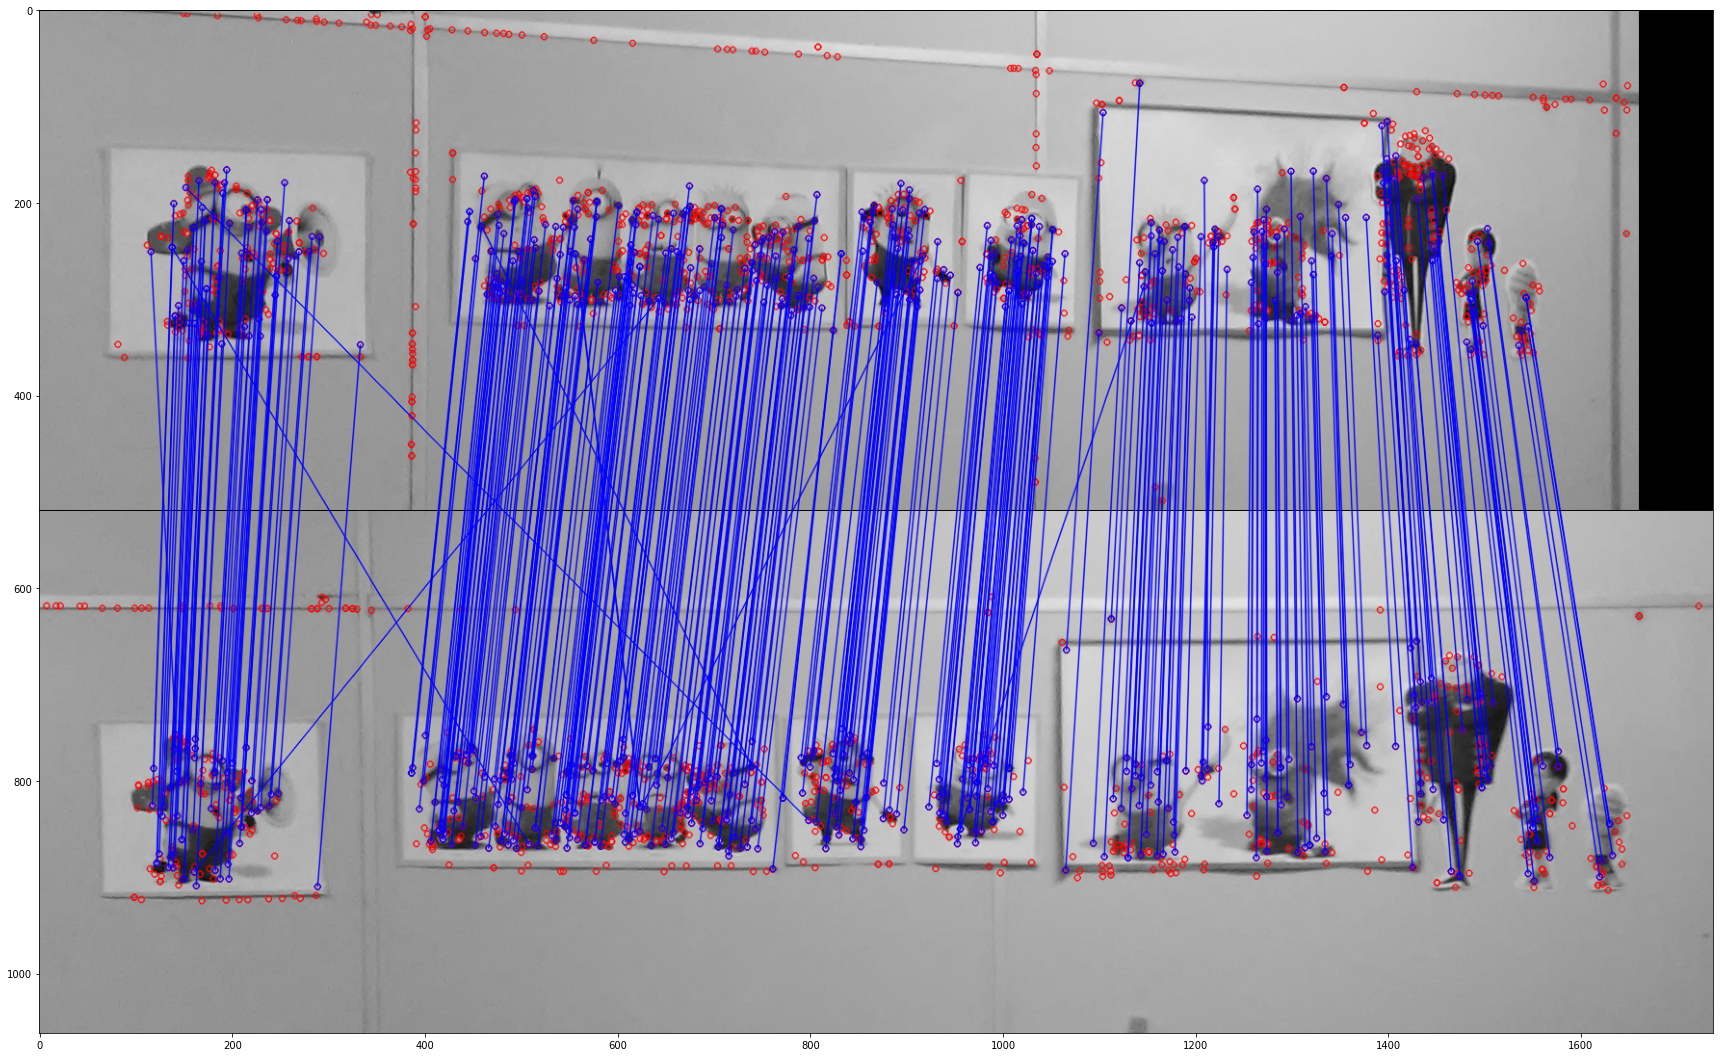

In [ ]:
import numpy as np
import cv2 as cv
import imutils
from matplotlib import pyplot as plt



img1 = cv.imread('minions01a.jpg',0) # queryImage
img2 = cv.imread('minions02a.jpg',0) # trainImage

img1 = imutils.rotate_bound(img1,90)
img2 = imutils.rotate_bound(img2, 90)

# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
# Need to draw only good matches, so create a mask
# Não é o RANSAC
# O Sift pode acabar fazendo com que pontos em uma imagem tenha matchs em mais de um ponto em outra.
# Então o código abaixo vai filtrar isso, eliminando o match do ponto que for menor similar (usa-se uma métrica de distância para escolher o melhor)
matchesMask = [[0,0] for i in range(len(matches))]
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]


# Código para plotar os resultados
# matchColor é a cor das linhas que serão desenhadas ligando os pontos de uma imagem com seus correspondentes na outra
# singlePointColor é a cor dos pontos de features (veja que muitos deles não tem correspondentes pois o algoritmo descarta os que são colineares etc..)
# Veja na figura que muitos matchs estão errados. ELES SÓ SÃO ELIMINADOS PELO MÉTODO DO RANSAC.
draw_params = dict(matchColor = (0,0,255),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)


# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

fig = plt.figure(figsize=(30,50))
plt.imshow(imutils.rotate_bound(img3,-90))
plt.show()


# FLANN Matcher

FLANN stands for Fast Library for Approximate Nearest Neighbors. 
It contains a collection of algorithms optimized for fast nearest neighbor search in large datasets and for high dimensional features. It works faster than BFMatcher for large datasets.

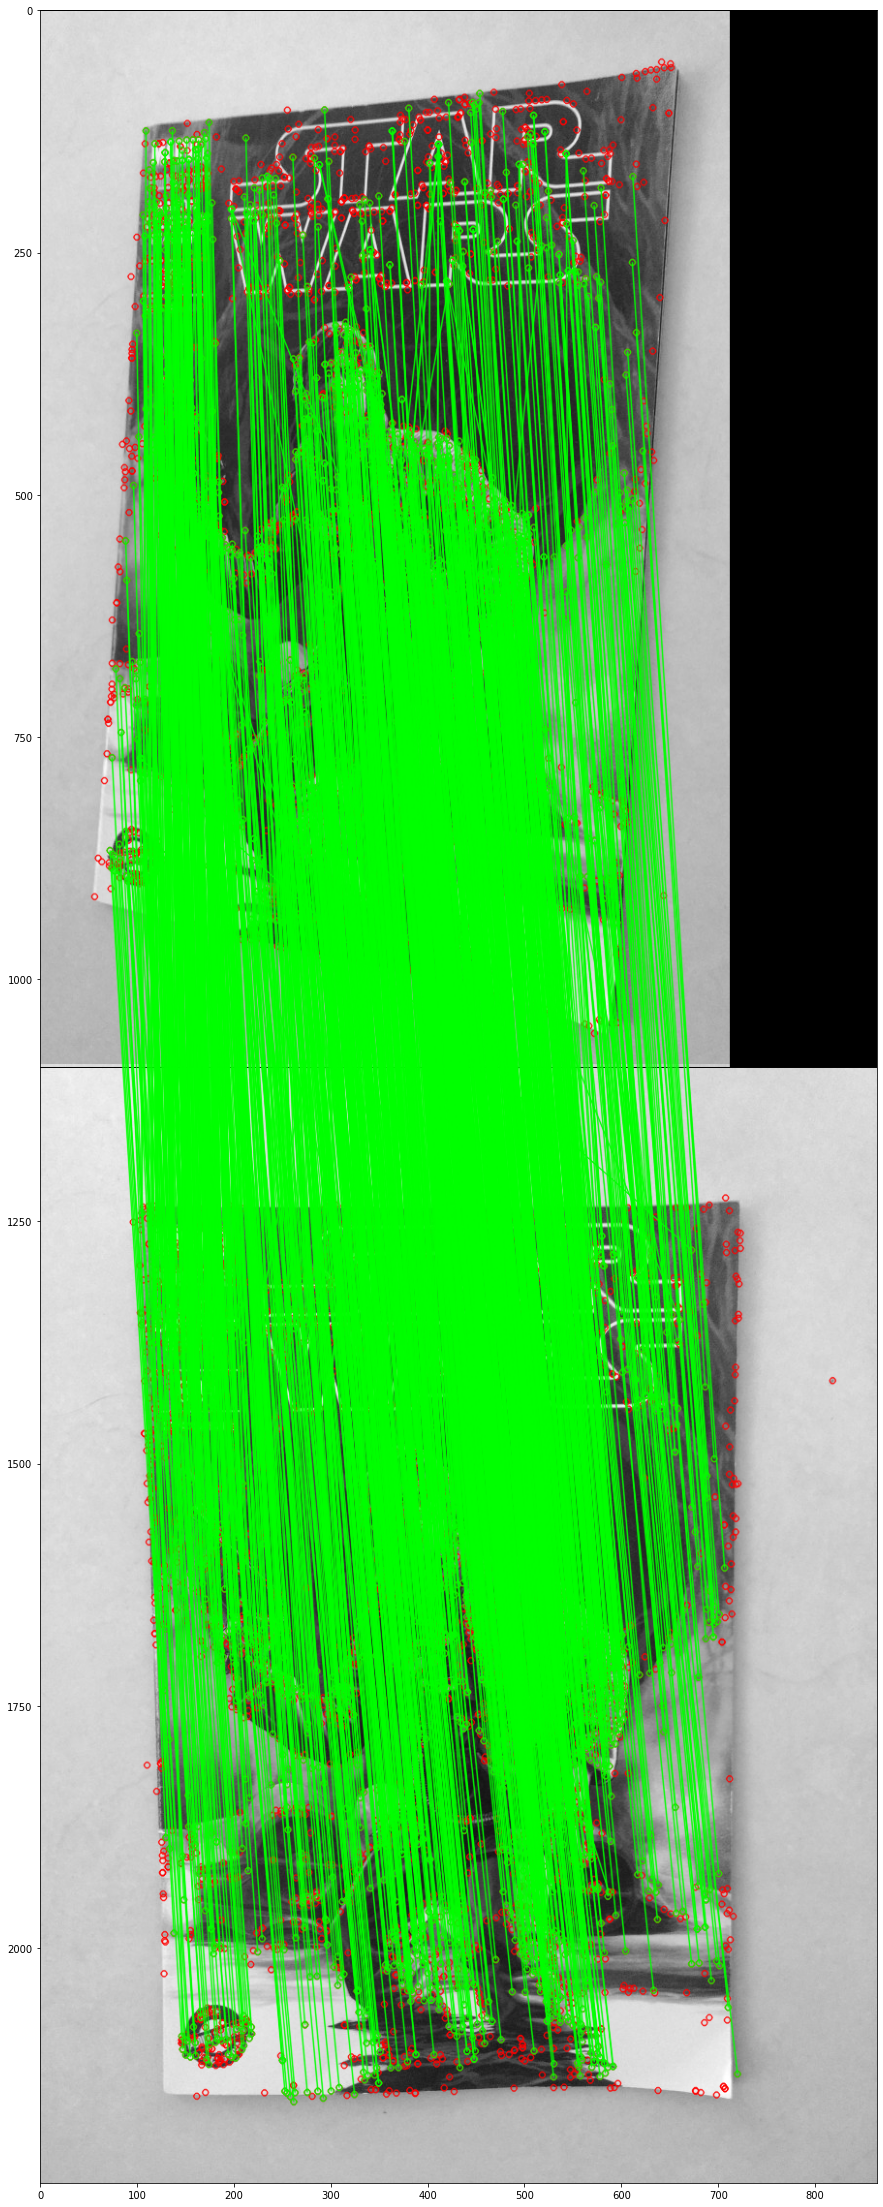

(<matplotlib.image.AxesImage at 0x7fd303b48668>, None)

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import imutils


img1 = cv.imread('comicsStarWars01.jpg',0)          # queryImage
img2 = cv.imread('comicsStarWars02.jpg',0) # trainImage

img1 = imutils.rotate_bound(img1,90)
img2 = imutils.rotate_bound(img2, 90)


# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
# FLANN stands for Fast Library for Approximate Nearest Neighbors. 
# It contains a collection of algorithms optimized for fast nearest neighbor 
# search in large datasets and for high dimensional features. 
# It works faster than BFMatcher for large datasets.
# The variable index_params specifies the algorithm to be used, its related parameters etc. 
# For algorithms like SIFT, SURF etc. you can pass following:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# The variable search_params specifies the number of times the trees in the index should 
# be recursively traversed. Higher values gives better precision, but also takes more time.
#search_params = dict(checks=50)   # or pass empty dictionary
search_params = dict()


flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
fig = plt.figure(figsize=(15,50))
plt.imshow(imutils.rotate_bound(img3, -90)),plt.show()

#Using SIFT and Homography to find an object in an image

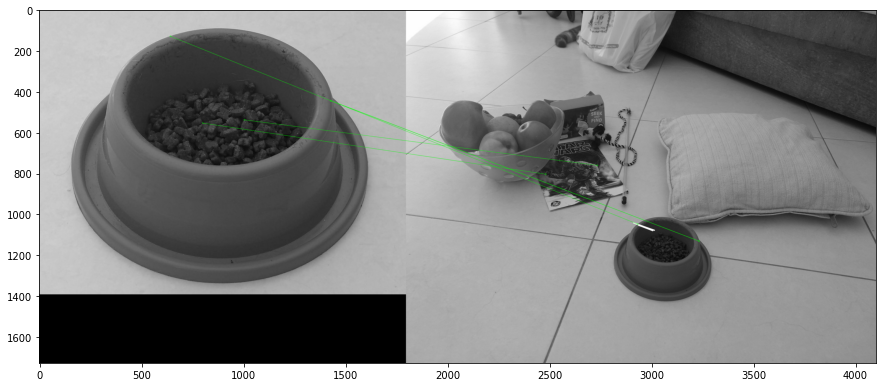

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import imutils



MIN_MATCH_COUNT = 10
img1a = cv.imread('catFood.jpg')          # queryImage
img1= cv.cvtColor(img1a,cv.COLOR_BGR2GRAY)
img2a = cv.imread('photo01a.jpg') # trainImage
img2= cv.cvtColor(img2a,cv.COLOR_BGR2GRAY)

#img1 = imutils.rotate_bound(img1,180)

# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN stands for Fast Library for Approximate Nearest Neighbors. 
# It contains a collection of algorithms optimized for fast nearest neighbor 
# search in large datasets and for high dimensional features. 
# It works faster than BFMatcher for large datasets.
# The variable index_params specifies the algorithm to be used, its related parameters etc. 
# For algorithms like SIFT, SURF etc. you can pass following:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# The variable search_params specifies the number of times the trees in the index should 
# be recursively traversed. Higher values gives better precision, but also takes more time.
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)


# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)



if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    #h,w,d = img1.shape
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
fig = plt.figure(figsize=(15,30))
plt.imshow(img3, 'gray')
plt.show()

#Using SIFT to estimate Homography between images and to warp the first image

<Figure size 432x288 with 0 Axes>

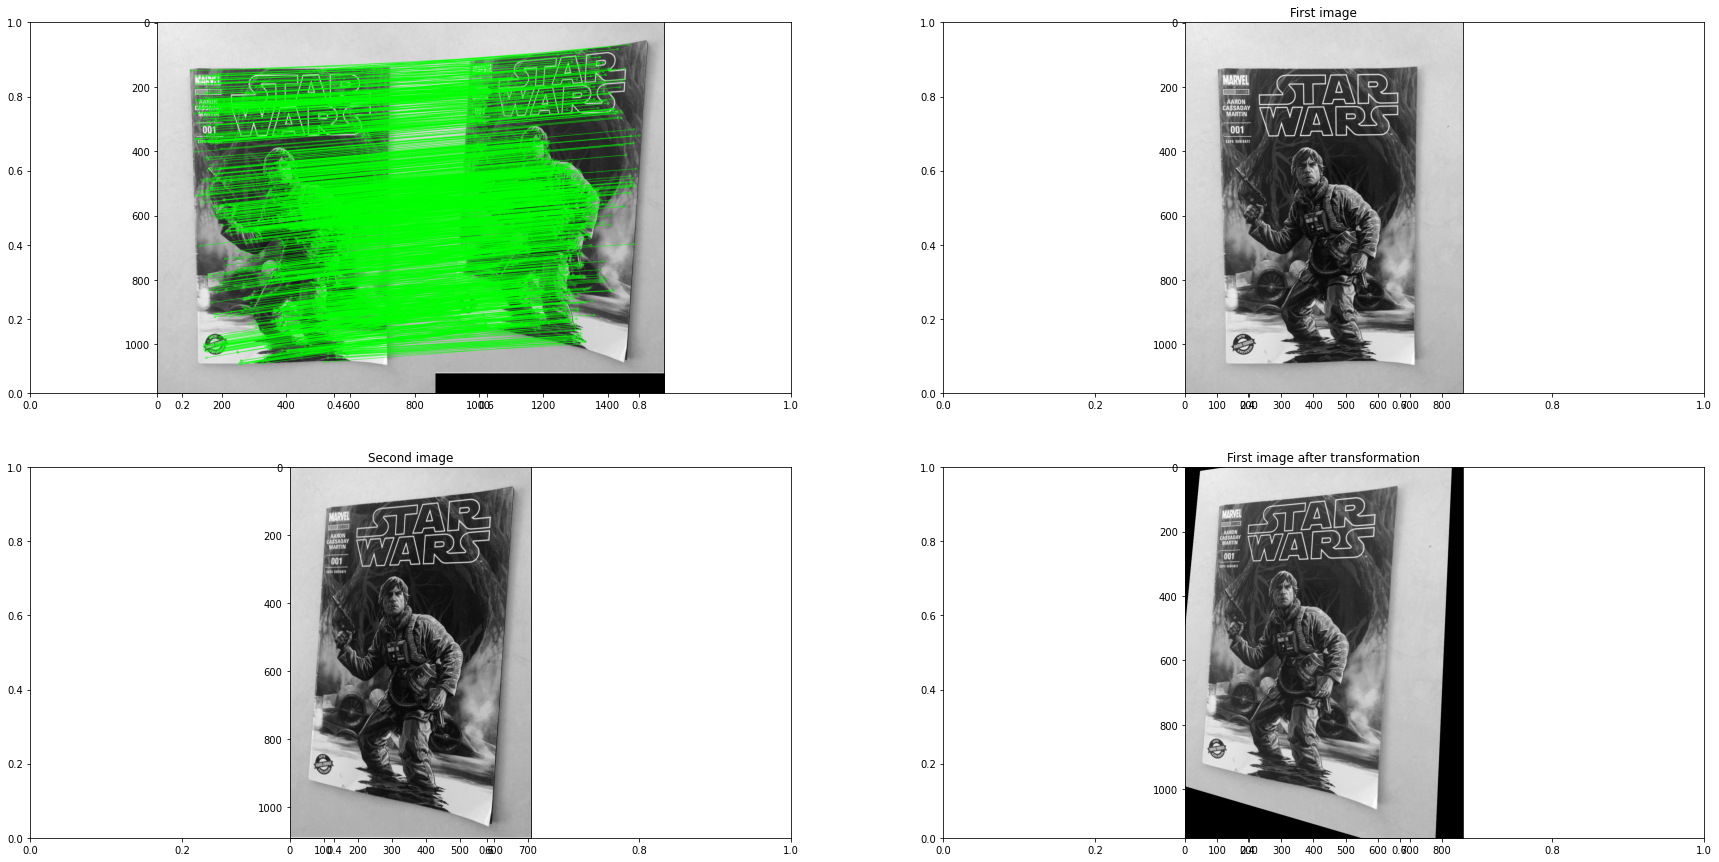

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import imutils




MIN_MATCH_COUNT = 10
img1 = cv.imread('comicsStarWars01.jpg',0)          # queryImage
img2 = cv.imread('comicsStarWars02.jpg',0) # trainImage

#img1 = imutils.rotate_bound(img1,180)

# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)


# FLANN stands for Fast Library for Approximate Nearest Neighbors. 
# It contains a collection of algorithms optimized for fast nearest neighbor 
# search in large datasets and for high dimensional features. 
# It works faster than BFMatcher for large datasets.
# The variable index_params specifies the algorithm to be used, its related parameters etc. 
# For algorithms like SIFT, SURF etc. you can pass following:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# The variable search_params specifies the number of times the trees in the index should 
# be recursively traversed. Higher values gives better precision, but also takes more time.
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
#bf = cv.BFMatcher()
#matches = bf.knnMatch(des1,des2,k=2)plt.imshow(img3, 'gray')



# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)



if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    img4 = cv.warpPerspective(img1, M, (img1.shape[1],img1.shape[0])) #, None) #, flags[, borderMode[, borderValue]]]]	)

else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)


fig = plt.figure()
fig, axs = plt.subplots(2,2,figsize=(30,15))
ax1 = fig.add_subplot(2,2,1)
plt.imshow(img3, 'gray')
ax1 = fig.add_subplot(2,2,2)
plt.title('First image')
plt.imshow(img1,'gray')
ax1 = fig.add_subplot(2,2,3)
plt.title('Second image')
plt.imshow(img2,'gray')
ax1 = fig.add_subplot(2,2,4)
plt.title('First image after transformation')
plt.imshow(img4,'gray')
plt.show()